# 基礎班

變數
```python
a = 1
```

### 四則運算
```python
a = 1
b = 2

a + b
a * b
a / b
a % b
```


### 函式
```python

def add(a, b):
    return a + b

/// 函式呼叫
print(add(1, 2))
```

###導入套件

```python
from matplotlib.pyplot as plt

```

### 基本資料型態
* str - 字串 "abcdef"
* bool - 布林值 True, False
* int - 正整數 1, 2, 3, 4
* float - 1.2

### 容器形別

* tuple - (1, 2, 3, 4)
* list - [1, 2, 3, 4]
* set - {1, 2, 3, 4}
* dict - {'key1': 1, 'value1': 2}

#### 問, tuple 與 list 的差異
tuple 不可更動

list 可以更動

In [ ]:
t = (1, 2, 3)
l = [1, 2, 3]

In [ ]:
l[0] = 5
l

In [ ]:
t[0] = 5

In [ ]:
t[1:]

In [ ]:
l[1:]

### 使用到的套件
```python

// 資料整理
import pandas

// 數學計算, 向量計算
import numpy

// 製圖
import plotly.express as px
import matplotlib

// 抓網路資料
import requests
```

## 綜合練習

下載 kaggle 資料
https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database

### 練習1
使用 pandas 讀入customers.csv  orders.csv

In [95]:
import pandas as pd

In [96]:
customers = pd.read_csv('customers.csv')
customers

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [97]:
orders = pd.read_csv('orders.csv')
orders

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,NaN,2,7
1611,1612,3,3,2018-10-21,2018-10-21,NaN,1,3
1612,1613,1,3,2018-11-18,2018-11-18,NaN,2,6
1613,1614,135,3,2018-11-28,2018-11-28,NaN,3,8


In [98]:
# 讀其它資料夾的檔案

# 相對路徑
pd.read_csv('data/brands.csv')

# 絕對路征
pd.read_csv('C:\\data\\brands.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\data\\brands.csv'

### 練習二
將 customers 跟 orders 合併成一個 DataFrame

需要利用 customers 與 orders 裡面的 customer_id 作為合併的依據

使用 pandas 的 merge

https://pandas.pydata.org/docs/reference/api/pandas.merge.html

In [99]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_date',
       'required_date', 'shipped_date', 'store_id', 'staff_id'],
      dtype='object')

In [100]:
merged = pd.merge(left=customers, right=orders, on='customer_id')
merged[['customer_id', 'first_name', 'last_name', 'order_id', 'order_status']]

,customer_id,first_name,last_name,order_id,order_status
0,1,Debra,Burks,599,4
1,1,Debra,Burks,1555,1
2,1,Debra,Burks,1613,3
3,2,Kasha,Todd,692,3
4,2,Kasha,Todd,1084,4
...,...,...,...,...,...
1610,1441,Jamaal,Morrison,1366,4
1611,1442,Cassie,Cline,1036,4
1612,1443,Lezlie,Lamb,558,4
1613,1444,Ivette,Estes,616,4


### 練習3
找出 Le Wood 所有訂單

first_name Le

last_name Wood


In [101]:
filters = (merged['first_name'] == 'Le') & (merged['last_name'] == 'Wood')
merged[filters]

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code,order_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
256,118,Le,Wood,NaN,le.wood@yahoo.com,90 Primrose Dr.,Pittsford,NY,14534,617,4,2016-12-21,2016-12-23,2016-12-23,2,7


In [102]:
merged[(merged['first_name'] == 'Le') & (merged['last_name'] == 'Wood')]

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code,order_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
256,118,Le,Wood,NaN,le.wood@yahoo.com,90 Primrose Dr.,Pittsford,NY,14534,617,4,2016-12-21,2016-12-23,2016-12-23,2,7


In [103]:
merged.query('first_name == "Le" & last_name == "Wood"')

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code,order_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
256,118,Le,Wood,NaN,le.wood@yahoo.com,90 Primrose Dr.,Pittsford,NY,14534,617,4,2016-12-21,2016-12-23,2016-12-23,2,7


### 練習 4

計算 customer_id 等於 1 的人有多少訂單


In [104]:
filter1 = merged['customer_id'] == 1
merged[filter1]['customer_id'].count()

3

### 練習5
計算每個 customer 分別有多少訂單

提示

df.groupby

df.size

In [124]:
num_orders = merged.groupby(['customer_id']).size()
num_orders

customer_id
1       3
2       3
3       3
4       3
5       3
       ..
1441    1
1442    1
1443    1
1444    1
1445    1
Length: 1445, dtype: int64

In [125]:
num_orders = num_orders.reset_index()

In [126]:
num_orders

,customer_id,0
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
1440,1441,1
1441,1442,1
1442,1443,1
1443,1444,1


### 練習6 改 num_orders 的欄位

0 改成 orders

In [129]:
num_orders.columns = ['customer_id', 'orders']
num_orders

,customer_id,orders
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
1440,1441,1
1441,1442,1
1442,1443,1
1443,1444,1


### 練習 7
統計每個訂單量有幾個人

比如說有幾個人有3個訂單

提示
照抄練習5

In [135]:
stats = num_orders.groupby(['orders']).size().reset_index()
stats.columns = ['orders', 'count']
stats

,orders,count
0,1,1314
1,2,92
2,3,39


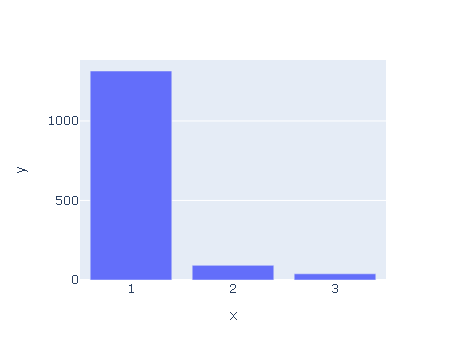

In [137]:
import plotly.express as px

px.bar(x = stats['orders'], y=stats['count'])


# 練習8 
畫成圓餅圖

提示
px.pie

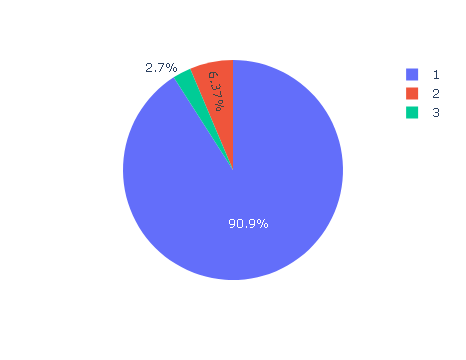

In [142]:
px.pie(stats, names='orders', values='count')

# 練習 9 

In [167]:
merged = pd.merge(left=customers, right=orders, on='customer_id')
df = merged[['customer_id', 'order_id', 'order_date']].reset_index(drop=True)

In [168]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [169]:
df.groupby('order_date').size().reset_index()

,customer_id,order_id,order_date
0,1,599,2016-12-09
1,1,1555,2018-04-18
2,1,1613,2018-11-18
3,2,692,2017-02-05
4,2,1084,2017-08-21
...,...,...,...
1610,1441,1366,2018-01-26
1611,1442,1036,2017-07-30
1612,1443,558,2016-11-15
1613,1444,616,2016-12-20


# 影像班

作業 01
請計算底下其中一張 cell 圖片裡面總共有幾個cell。

https://www.nexcelom.com/wp-content/uploads/2020/07/trypan-blue-stained-cho-cells.jpg

https://www.news-medical.net/image.axd?picture=2020%2F4%2Fart2-1-3.jpg

https://media-us.amboss.com/media/thumbs/big_5769bf9d1ee41.jpg

In [ ]:
!curl -O https://media-us.amboss.com/media/thumbs/big_5769bf9d1ee41.jpg

In [ ]:
import cv2

In [ ]:
original = cv2.imread('big_5769bf9d1ee41.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
import plotly.express as px
px.imshow(original, color_continuous_scale='gray')

In [ ]:
_, binary = cv2.threshold(original, 200, 255, cv2.THRESH_BINARY)

In [ ]:
px.imshow(binary, color_continuous_scale='gray')

In [ ]:
binary_inv = 255 - binary
px.imshow(binary_inv, color_continuous_scale='gray')

In [ ]:
_, binary3 = cv2.threshold(original, 200, 255, cv2.THRESH_BINARY_INV)
px.imshow(binary3, color_continuous_scale='gray')

In [ ]:
# open 的操作,  erode 再 diluate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(binary3, kernel)

In [ ]:
px.imshow(eroded, color_continuous_scale='gray')

In [ ]:
opened = cv2.dilate(eroded, kernel)
px.imshow(opened, color_continuous_scale='gray')

In [ ]:
contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
processed = original.copy()
for (i, c) in enumerate(contours):
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(processed, (x, y), (x+w, y+h), (0, 0, 255), 3)
  cv2.putText(processed, f"{i+1}", (x, y - 5), 2, 0.5, (0, 0, 255), 2)
px.imshow(processed)

In [ ]:
# 取得第一組邊界的資訊
contours[0]

In [ ]:
# 取得第一組邊界的正方向
cv2.boundingRect(contours[0])

### enumerate 解釋

In [ ]:
a = ['a' , 'b', 'c']
for item in a:
    print(item)

In [ ]:
for index, item in enumerate(a):
    print(index, item)

# 綜合問答

rds 練習

https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database

In [ ]:
#